## Diffusivity effect in tracer transport along several cross-sections 

Transports across several cross sections in the domain (See plot further down)

Advective tracer transport $\Phi_{Tadv}=C\vec{u}\cdot\vec{a}$ from model output diagnostics.

Diffusive tracer transport $\Phi_{Tdiff}$ from model output (Includes diffusion due to advection scheme)

| variable  | dims | units | description |
|:---------:|:---------:|:---------:|:---------:|
| UTRAC01   |   (T, Zmd000090, Y, Xp1) | Mol/L.m/s | Zonal Mass-Weighted Transp of Tr1 |
| VTRAC01   |   (T, Zmd000090, Yp1, X) | Mol/L.m/s | Meridional Mass-Weighted Transp of Tr1 |
| WTRAC01   |   (T, Zmd000090, Y, X)   | Mol/L.m/s | Vertical Mass-Weighted Transp of Tr1 |  
| ADVrTr01  |   (T, Zld000090, Y, X)   | Mol/L.m^3/s| Zonal Advective Flux of Tr1 |
| ADVxTr01  |   (T, Zmd000090, Y, Xp1) | Mol/L.m^3/s| Meridional Advective Flux of Tr1 |
| ADVyTr01  |   (T, Zmd000090, Yp1, X) | Mol/L.m^3/s| Vertical Advective Flux of Tr1 |
| DFrETr01  |   (T, Zld000090, Y, X)   | Mol/L.m^3/s| Vertical Diffusive Flux of Tr1 (Explicit part) |
| DFrITr01  |   (T, Zld000090, Y, X)   | Mol/L.m^3/s| Vertical Diffusive Flux of Tr1 (Implicit part) |
| DFxETr01  |   (T, Zmd000090, Y, Xp1) | Mol/L.m^3/s| Zonal Diffusive Flux of Tr1 |
| DFyETr01  |   (T, Zmd000090, Yp1, X) | Mol/L.m^3/s| Meridional Diffusive Flux of Tr1 |


In [1]:
import datetime as dtm      # Python's standard date and time library
import dateutil as dutil    # Powerful datetime extensions
import glob
from math import *
from matplotlib.dates import num2date
import matplotlib.pyplot as plt
%matplotlib inline
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.io
import xarray as xr


In [2]:
def calc_trac_transport_CS(flux_component, x_slice, y_slice, dim_name):
    '''
    INPUT:
    flux_component: xarray, flux component perpendicular to cross section (e.g. unstagger_xarray(flux3D04.V,'Yp1'))
    x_slice : slice or index of cross-section in alongshore direction
    y_slice : slice or index of cross-section in cross-shore direction
    dim_name: str, name of the dimension along which to sum.
    
    '''
    return (flux_component.isel(Yp1=y_slice, X=x_slice)).sum(dim=dim_name)

def calc_trac_transport_AS(flux_component, x_slice, y_slice, dim_name):
    '''
    INPUT:
    flux_component: xarray, Flux component perpendicular to cross section (e.g. unstagger_xarray(flux3D04.V,'Yp1'))
    x_slice : slice or index of cross-section in alongshore direction
    y_slice : slice or index of cross-section in cross-shore direction
    dim_name: str, name of the dimension along which to sum.
    
    '''
    return (flux_component.isel(Y=y_slice, Xp1=x_slice)).sum(dim=dim_name)
   

def unstagger_xarray(qty, index):
    """Interpolate u, v, or w component values to values at grid cell centres.
    
    Named indexing requires that input arrays are XArray DataArrays.

    :arg qty: u, v, or w component values
    :type qty: :py:class:`xarray.DataArray`
    
    :arg index: index name along which to centre
        (generally one of 'gridX', 'gridY', or 'depth')
    :type index: str

    :returns qty: u, v, or w component values at grid cell centres
    :rtype: :py:class:`xarray.DataArray`
    """
    
    qty = (qty + qty.shift(**{index: 1})) / 2
    
    return qty

def fig_looks(ax, title = 'Cross-shelf transport'):
    '''define aesthetics of transport plots'''
    sns.set_style(style='whitegrid')
    sns.set_context('talk')

    ax.set_ylabel('tracer transport [$Mol/l.m^3s^{-1}$]')
    ax.set_xlabel('Time [$s$]')
    ax.legend(loc=0)
    ax.set_title(title)
    
    return(ax)
    

In [3]:
grid_file = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob.nc'
flux_file03 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/FluxTR01Glob.nc'
flux_file11 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run11/FluxTR01Glob.nc'
flux_file12 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run12/FluxTR01Glob.nc'
flux_file17 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run17/FluxTR01Glob.nc'
flux_file3D04 = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run04/FluxTR01Glob.nc'

gridNoC_file = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/gridGlob.nc'
flux_file07 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/FluxTR01Glob.nc'
flux_file24 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run24/FluxTR01Glob.nc'
flux_file25 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run25/FluxTR01Glob.nc'
flux_file30 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run30/FluxTR01Glob.nc'
flux_file30 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run30/FluxTR01Glob.nc'

grid = xr.open_dataset(grid_file)
flux03 = xr.open_dataset(flux_file03)
flux11 = xr.open_dataset(flux_file11)
flux12 = xr.open_dataset(flux_file12)
flux17 = xr.open_dataset(flux_file17)
flux3D04 = xr.open_dataset(flux_file3D04)

gridNoC = xr.open_dataset(gridNoC_file)
flux07 = xr.open_dataset(flux_file07)
flux24 = xr.open_dataset(flux_file24)
flux25 = xr.open_dataset(flux_file25)
flux30 = xr.open_dataset(flux_file30)
flux30 = xr.open_dataset(flux_file30)


### Cross-sections

In [4]:
CS1_x_slice = slice(0, 59)
CS2_x_slice = slice(60, 119)
CS3_x_slice = slice(120, 224)
CS4_x_slice = slice(225, 299)
CS5_x_slice = slice(300, 359)

CS1_y_ind = 227
CS1b_y_ind = 267
CS1c_y_ind = 297
CS1d_y_ind = 359

AS1_y_slice = slice(227, 266)
AS2_y_slice = slice(267, 298)
AS3_y_slice = slice(299, 359)

AS1_x_ind = 59
AS1b_x_ind = 119
AS1c_x_ind = 224
AS1d_x_ind = 299

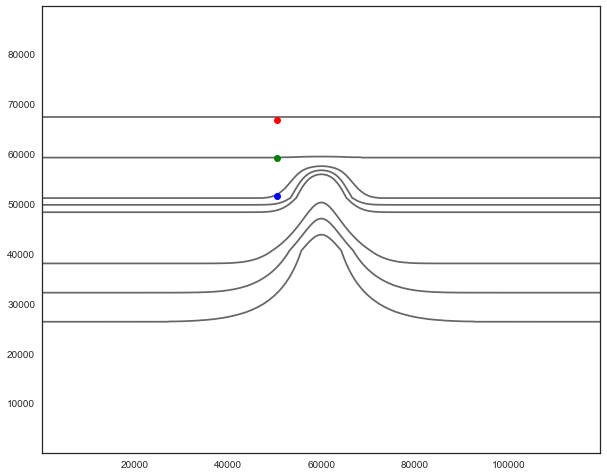

In [5]:
sns.set_style(style='white')
fig, ax = plt.subplots(1, 1, figsize=(10,8))

ax.contour(grid.X,grid.Y,grid.Depth,[50,100,150,200,250,600,800,1000], colors='0.4')
ax.plot(grid.X[120],grid.Y[227], 'bo')
ax.plot(grid.X[120],grid.Y[267], 'go')
ax.plot(grid.X[120],grid.Y[297], 'ro')

In [6]:
advCS1_flux03 = calc_trac_transport_CS(unstagger_xarray(flux03.ADVyTr01,'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS2_flux03 = calc_trac_transport_CS(unstagger_xarray(flux03.ADVyTr01,'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS3_flux03 = calc_trac_transport_CS(unstagger_xarray(flux03.ADVyTr01,'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS4_flux03 = calc_trac_transport_CS(unstagger_xarray(flux03.ADVyTr01,'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS5_flux03 = calc_trac_transport_CS(unstagger_xarray(flux03.ADVyTr01,'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

advCS1_flux11 = calc_trac_transport_CS(unstagger_xarray(flux11.ADVyTr01,'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS2_flux11 = calc_trac_transport_CS(unstagger_xarray(flux11.ADVyTr01,'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS3_flux11 = calc_trac_transport_CS(unstagger_xarray(flux11.ADVyTr01,'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS4_flux11 = calc_trac_transport_CS(unstagger_xarray(flux11.ADVyTr01,'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS5_flux11 = calc_trac_transport_CS(unstagger_xarray(flux11.ADVyTr01,'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

advCS1_flux12 = calc_trac_transport_CS(unstagger_xarray(flux12.ADVyTr01,'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS2_flux12 = calc_trac_transport_CS(unstagger_xarray(flux12.ADVyTr01,'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS3_flux12 = calc_trac_transport_CS(unstagger_xarray(flux12.ADVyTr01,'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS4_flux12 = calc_trac_transport_CS(unstagger_xarray(flux12.ADVyTr01,'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS5_flux12 = calc_trac_transport_CS(unstagger_xarray(flux12.ADVyTr01,'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

advCS1_flux17 = calc_trac_transport_CS(unstagger_xarray(flux17.ADVyTr01,'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS2_flux17 = calc_trac_transport_CS(unstagger_xarray(flux17.ADVyTr01,'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS3_flux17 = calc_trac_transport_CS(unstagger_xarray(flux17.ADVyTr01,'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS4_flux17 = calc_trac_transport_CS(unstagger_xarray(flux17.ADVyTr01,'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS5_flux17 = calc_trac_transport_CS(unstagger_xarray(flux17.ADVyTr01,'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

advCS1_flux3D04 = calc_trac_transport_CS(unstagger_xarray(flux3D04.ADVyTr01,'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS2_flux3D04 = calc_trac_transport_CS(unstagger_xarray(flux3D04.ADVyTr01,'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS3_flux3D04 = calc_trac_transport_CS(unstagger_xarray(flux3D04.ADVyTr01,'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS4_flux3D04 = calc_trac_transport_CS(unstagger_xarray(flux3D04.ADVyTr01,'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS5_flux3D04 = calc_trac_transport_CS(unstagger_xarray(flux3D04.ADVyTr01,'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

In [7]:
advCS1_flux07 = calc_trac_transport_CS(unstagger_xarray(flux07.ADVyTr01,'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS2_flux07 = calc_trac_transport_CS(unstagger_xarray(flux07.ADVyTr01,'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS3_flux07 = calc_trac_transport_CS(unstagger_xarray(flux07.ADVyTr01,'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS4_flux07 = calc_trac_transport_CS(unstagger_xarray(flux07.ADVyTr01,'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS5_flux07 = calc_trac_transport_CS(unstagger_xarray(flux07.ADVyTr01,'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

advCS1_flux24 = calc_trac_transport_CS(unstagger_xarray(flux24.ADVyTr01,'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS2_flux24 = calc_trac_transport_CS(unstagger_xarray(flux24.ADVyTr01,'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS3_flux24 = calc_trac_transport_CS(unstagger_xarray(flux24.ADVyTr01,'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS4_flux24 = calc_trac_transport_CS(unstagger_xarray(flux24.ADVyTr01,'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS5_flux24 = calc_trac_transport_CS(unstagger_xarray(flux24.ADVyTr01,'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

advCS1_flux25 = calc_trac_transport_CS(unstagger_xarray(flux25.ADVyTr01,'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS2_flux25 = calc_trac_transport_CS(unstagger_xarray(flux25.ADVyTr01,'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS3_flux25 = calc_trac_transport_CS(unstagger_xarray(flux25.ADVyTr01,'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS4_flux25 = calc_trac_transport_CS(unstagger_xarray(flux25.ADVyTr01,'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS5_flux25 = calc_trac_transport_CS(unstagger_xarray(flux25.ADVyTr01,'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

advCS1_flux30 = calc_trac_transport_CS(unstagger_xarray(flux30.ADVyTr01,'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS2_flux30 = calc_trac_transport_CS(unstagger_xarray(flux30.ADVyTr01,'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS3_flux30 = calc_trac_transport_CS(unstagger_xarray(flux30.ADVyTr01,'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS4_flux30 = calc_trac_transport_CS(unstagger_xarray(flux30.ADVyTr01,'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS5_flux30 = calc_trac_transport_CS(unstagger_xarray(flux30.ADVyTr01,'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

advCS1_flux30 = calc_trac_transport_CS(unstagger_xarray(flux30.ADVyTr01,'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS2_flux30 = calc_trac_transport_CS(unstagger_xarray(flux30.ADVyTr01,'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS3_flux30 = calc_trac_transport_CS(unstagger_xarray(flux30.ADVyTr01,'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS4_flux30 = calc_trac_transport_CS(unstagger_xarray(flux30.ADVyTr01,'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS5_flux30 = calc_trac_transport_CS(unstagger_xarray(flux30.ADVyTr01,'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

In [8]:
difCS1_flux03 = calc_trac_transport_CS(unstagger_xarray(flux03.DFyETr01,'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS2_flux03 = calc_trac_transport_CS(unstagger_xarray(flux03.DFyETr01,'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS3_flux03 = calc_trac_transport_CS(unstagger_xarray(flux03.DFyETr01,'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS4_flux03 = calc_trac_transport_CS(unstagger_xarray(flux03.DFyETr01,'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS5_flux03 = calc_trac_transport_CS(unstagger_xarray(flux03.DFyETr01,'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

difCS1_flux11 = calc_trac_transport_CS(unstagger_xarray(flux11.DFyETr01,'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS2_flux11 = calc_trac_transport_CS(unstagger_xarray(flux11.DFyETr01,'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS3_flux11 = calc_trac_transport_CS(unstagger_xarray(flux11.DFyETr01,'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS4_flux11 = calc_trac_transport_CS(unstagger_xarray(flux11.DFyETr01,'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS5_flux11 = calc_trac_transport_CS(unstagger_xarray(flux11.DFyETr01,'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

difCS1_flux12 = calc_trac_transport_CS(unstagger_xarray(flux12.DFyETr01,'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS2_flux12 = calc_trac_transport_CS(unstagger_xarray(flux12.DFyETr01,'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS3_flux12 = calc_trac_transport_CS(unstagger_xarray(flux12.DFyETr01,'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS4_flux12 = calc_trac_transport_CS(unstagger_xarray(flux12.DFyETr01,'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS5_flux12 = calc_trac_transport_CS(unstagger_xarray(flux12.DFyETr01,'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

difCS1_flux17 = calc_trac_transport_CS(unstagger_xarray(flux17.DFyETr01,'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS2_flux17 = calc_trac_transport_CS(unstagger_xarray(flux17.DFyETr01,'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS3_flux17 = calc_trac_transport_CS(unstagger_xarray(flux17.DFyETr01,'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS4_flux17 = calc_trac_transport_CS(unstagger_xarray(flux17.DFyETr01,'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS5_flux17 = calc_trac_transport_CS(unstagger_xarray(flux17.DFyETr01,'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

difCS1_flux3D04 = calc_trac_transport_CS(unstagger_xarray(flux3D04.DFyETr01,'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS2_flux3D04 = calc_trac_transport_CS(unstagger_xarray(flux3D04.DFyETr01,'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS3_flux3D04 = calc_trac_transport_CS(unstagger_xarray(flux3D04.DFyETr01,'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS4_flux3D04 = calc_trac_transport_CS(unstagger_xarray(flux3D04.DFyETr01,'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS5_flux3D04 = calc_trac_transport_CS(unstagger_xarray(flux3D04.DFyETr01,'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

In [9]:
difCS1_flux07 = calc_trac_transport_CS(unstagger_xarray(flux07.DFyETr01,'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS2_flux07 = calc_trac_transport_CS(unstagger_xarray(flux07.DFyETr01,'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS3_flux07 = calc_trac_transport_CS(unstagger_xarray(flux07.DFyETr01,'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS4_flux07 = calc_trac_transport_CS(unstagger_xarray(flux07.DFyETr01,'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS5_flux07 = calc_trac_transport_CS(unstagger_xarray(flux07.DFyETr01,'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

difCS1_flux24 = calc_trac_transport_CS(unstagger_xarray(flux24.DFyETr01,'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS2_flux24 = calc_trac_transport_CS(unstagger_xarray(flux24.DFyETr01,'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS3_flux24 = calc_trac_transport_CS(unstagger_xarray(flux24.DFyETr01,'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS4_flux24 = calc_trac_transport_CS(unstagger_xarray(flux24.DFyETr01,'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS5_flux24 = calc_trac_transport_CS(unstagger_xarray(flux24.DFyETr01,'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

difCS1_flux25 = calc_trac_transport_CS(unstagger_xarray(flux25.DFyETr01,'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS2_flux25 = calc_trac_transport_CS(unstagger_xarray(flux25.DFyETr01,'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS3_flux25 = calc_trac_transport_CS(unstagger_xarray(flux25.DFyETr01,'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS4_flux25 = calc_trac_transport_CS(unstagger_xarray(flux25.DFyETr01,'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS5_flux25 = calc_trac_transport_CS(unstagger_xarray(flux25.DFyETr01,'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

difCS1_flux30 = calc_trac_transport_CS(unstagger_xarray(flux30.DFyETr01,'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS2_flux30 = calc_trac_transport_CS(unstagger_xarray(flux30.DFyETr01,'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS3_flux30 = calc_trac_transport_CS(unstagger_xarray(flux30.DFyETr01,'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS4_flux30 = calc_trac_transport_CS(unstagger_xarray(flux30.DFyETr01,'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS5_flux30 = calc_trac_transport_CS(unstagger_xarray(flux30.DFyETr01,'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

difCS1_flux30 = calc_trac_transport_CS(unstagger_xarray(flux30.DFyETr01,'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS2_flux30 = calc_trac_transport_CS(unstagger_xarray(flux30.DFyETr01,'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS3_flux30 = calc_trac_transport_CS(unstagger_xarray(flux30.DFyETr01,'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS4_flux30 = calc_trac_transport_CS(unstagger_xarray(flux30.DFyETr01,'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS5_flux30 = calc_trac_transport_CS(unstagger_xarray(flux30.DFyETr01,'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

### Cross-shelf sections

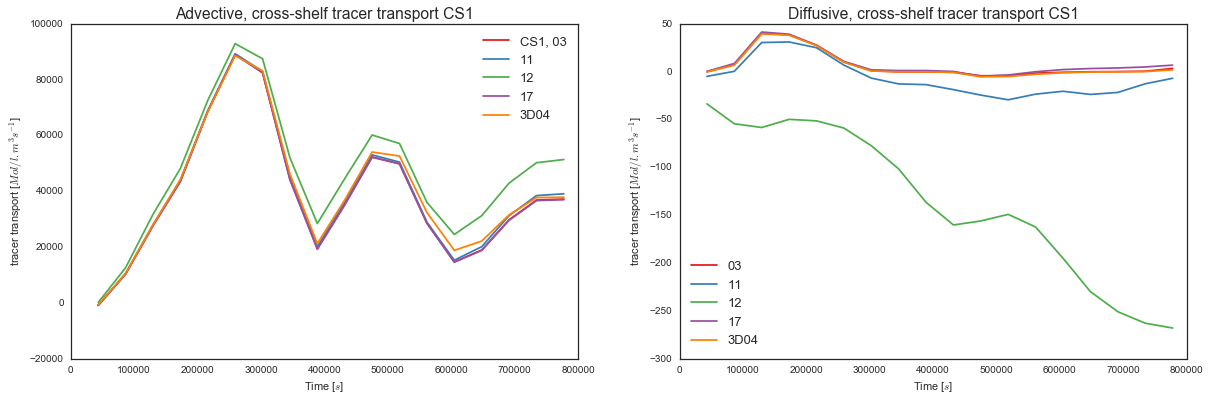

In [10]:
sns.set_palette('Set1')
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advCS1_flux03).plot(ax=ax[0], label = 'CS1, 03')
(advCS1_flux11).plot(ax=ax[0], label = '11')
(advCS1_flux12).plot(ax=ax[0], label = '12')
(advCS1_flux17).plot(ax=ax[0], label = '17')
(advCS1_flux3D04).plot(ax=ax[0], label = '3D04') 


(difCS1_flux03).plot(ax=ax[1], label = '03')
(difCS1_flux11).plot(ax=ax[1], label = '11')
(difCS1_flux12).plot(ax=ax[1], label = '12')
(difCS1_flux17).plot(ax=ax[1], label = '17')
(difCS1_flux3D04).plot(ax=ax[1], label = '3D04') 


ax[0] = fig_looks(ax[0],title='Advective, cross-shelf tracer transport CS1')
ax[1] = fig_looks(ax[1],title='Diffusive, cross-shelf tracer transport CS1')

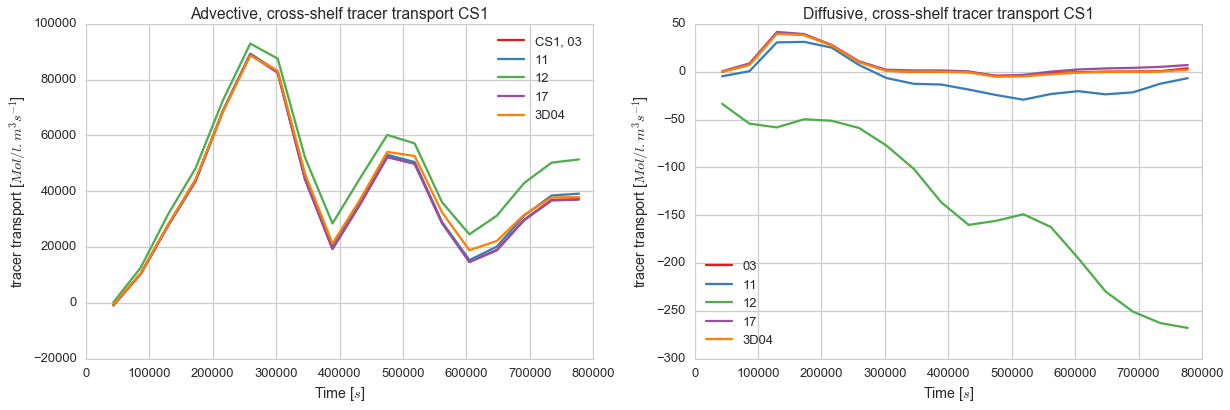

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advCS1_flux03).plot(ax=ax[0], label = 'CS1, 03')
(advCS1_flux11).plot(ax=ax[0], label = '11')
(advCS1_flux12).plot(ax=ax[0], label = '12')
(advCS1_flux17).plot(ax=ax[0], label = '17')
(advCS1_flux3D04).plot(ax=ax[0], label = '3D04') 


(difCS1_flux03).plot(ax=ax[1], label = '03')
(difCS1_flux11).plot(ax=ax[1], label = '11')
(difCS1_flux12).plot(ax=ax[1], label = '12')
(difCS1_flux17).plot(ax=ax[1], label = '17')
(difCS1_flux3D04).plot(ax=ax[1], label = '3D04') 


ax[0] = fig_looks(ax[0],title='Advective, cross-shelf tracer transport CS1')
ax[1] = fig_looks(ax[1],title='Diffusive, cross-shelf tracer transport CS1')

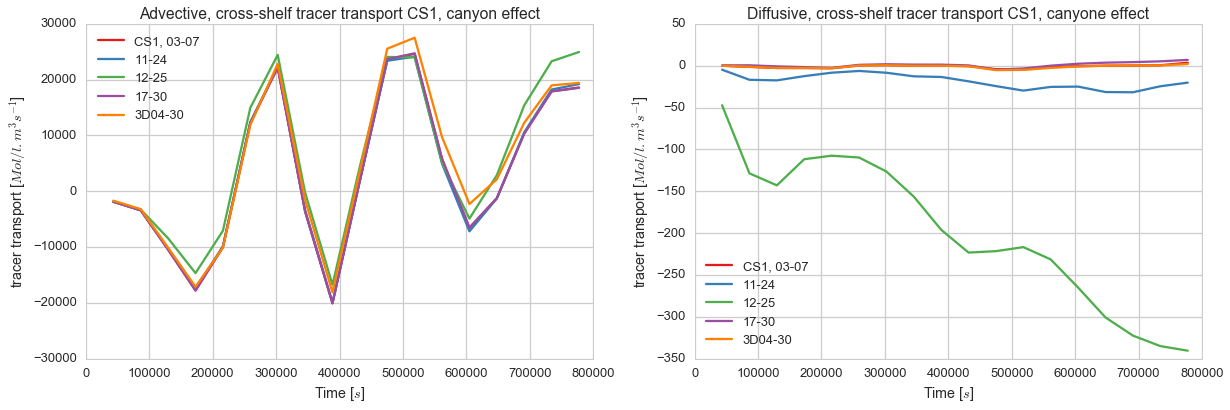

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advCS1_flux03-advCS1_flux07).plot(ax=ax[0], label = 'CS1, 03-07')
(advCS1_flux11-advCS1_flux24).plot(ax=ax[0], label = '11-24')
(advCS1_flux12-advCS1_flux25).plot(ax=ax[0], label = '12-25')
(advCS1_flux17-advCS1_flux30).plot(ax=ax[0], label = '17-30')
(advCS1_flux3D04-advCS1_flux30).plot(ax=ax[0], label = '3D04-30') 


(difCS1_flux03-difCS1_flux07).plot(ax=ax[1], label = 'CS1, 03-07')
(difCS1_flux11-difCS1_flux24).plot(ax=ax[1], label = '11-24')
(difCS1_flux12-difCS1_flux25).plot(ax=ax[1], label = '12-25')
(difCS1_flux17-difCS1_flux30).plot(ax=ax[1], label = '17-30')
(difCS1_flux3D04-difCS1_flux30).plot(ax=ax[1], label = '3D04-30') 


ax[0] = fig_looks(ax[0],title='Advective, cross-shelf tracer transport CS1, canyon effect')
ax[1] = fig_looks(ax[1],title='Diffusive, cross-shelf tracer transport CS1, canyone effect')

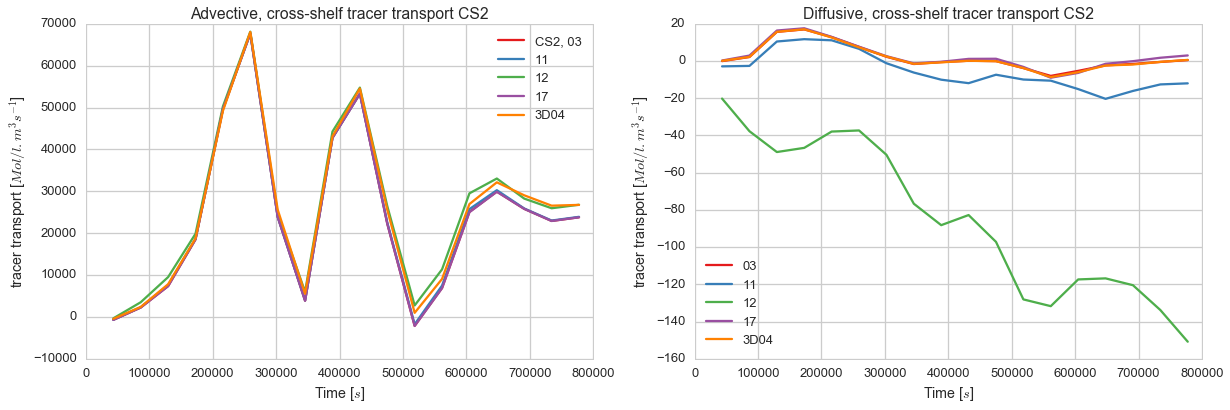

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advCS2_flux03).plot(ax=ax[0], label = 'CS2, 03')
(advCS2_flux11).plot(ax=ax[0], label = '11')
(advCS2_flux12).plot(ax=ax[0], label = '12')
(advCS2_flux17).plot(ax=ax[0], label = '17')
(advCS2_flux3D04).plot(ax=ax[0], label = '3D04') 


(difCS2_flux03).plot(ax=ax[1], label = '03')
(difCS2_flux11).plot(ax=ax[1], label = '11')
(difCS2_flux12).plot(ax=ax[1], label = '12')
(difCS2_flux17).plot(ax=ax[1], label = '17')
(difCS2_flux3D04).plot(ax=ax[1], label = '3D04') 


ax[0] = fig_looks(ax[0],title='Advective, cross-shelf tracer transport CS2')
ax[1] = fig_looks(ax[1],title='Diffusive, cross-shelf tracer transport CS2')

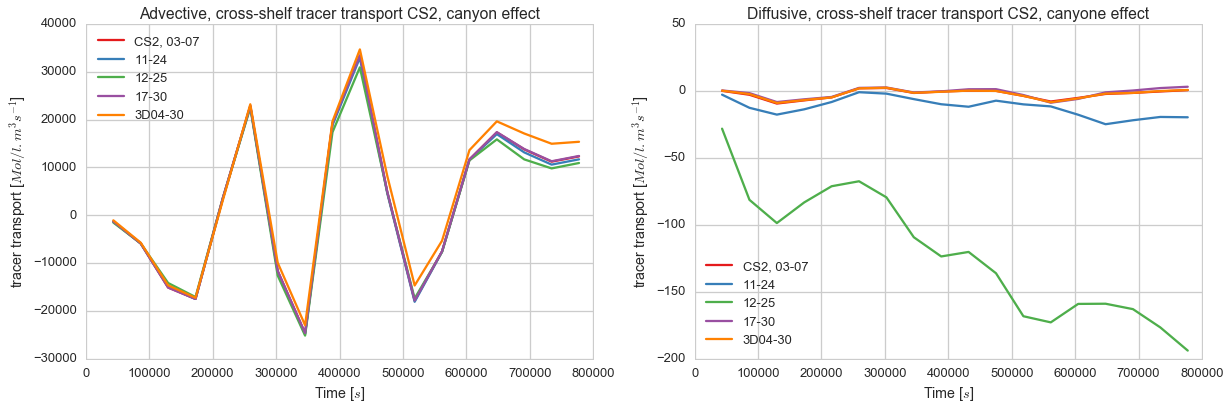

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advCS2_flux03-advCS2_flux07).plot(ax=ax[0], label = 'CS2, 03-07')
(advCS2_flux11-advCS2_flux24).plot(ax=ax[0], label = '11-24')
(advCS2_flux12-advCS2_flux25).plot(ax=ax[0], label = '12-25')
(advCS2_flux17-advCS2_flux30).plot(ax=ax[0], label = '17-30')
(advCS2_flux3D04-advCS2_flux30).plot(ax=ax[0], label = '3D04-30') 


(difCS2_flux03-difCS2_flux07).plot(ax=ax[1], label = 'CS2, 03-07')
(difCS2_flux11-difCS2_flux24).plot(ax=ax[1], label = '11-24')
(difCS2_flux12-difCS2_flux25).plot(ax=ax[1], label = '12-25')
(difCS2_flux17-difCS2_flux30).plot(ax=ax[1], label = '17-30')
(difCS2_flux3D04-difCS2_flux30).plot(ax=ax[1], label = '3D04-30') 


ax[0] = fig_looks(ax[0],title='Advective, cross-shelf tracer transport CS2, canyon effect')
ax[1] = fig_looks(ax[1],title='Diffusive, cross-shelf tracer transport CS2, canyone effect')

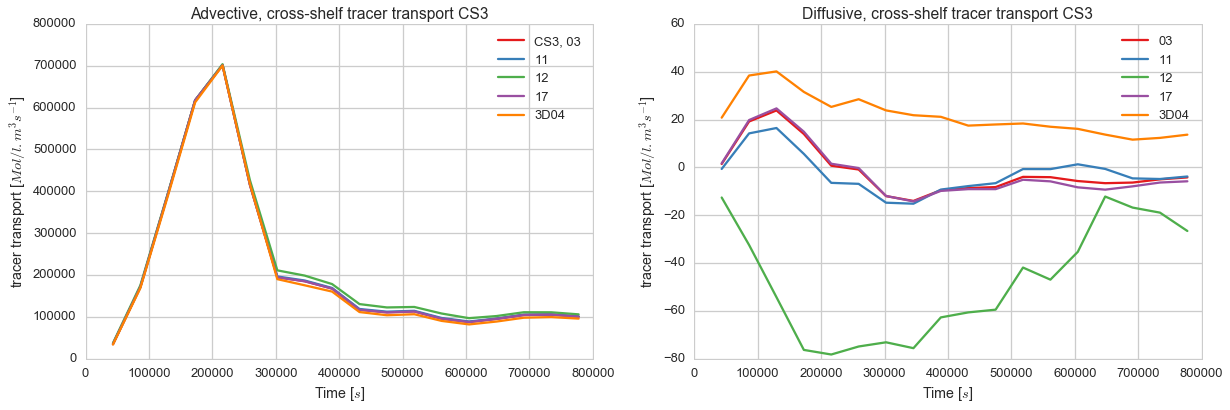

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advCS3_flux03).plot(ax=ax[0], label = 'CS3, 03')
(advCS3_flux11).plot(ax=ax[0], label = '11')
(advCS3_flux12).plot(ax=ax[0], label = '12')
(advCS3_flux17).plot(ax=ax[0], label = '17')
(advCS3_flux3D04).plot(ax=ax[0], label = '3D04') 


(difCS3_flux03).plot(ax=ax[1], label = '03')
(difCS3_flux11).plot(ax=ax[1], label = '11')
(difCS3_flux12).plot(ax=ax[1], label = '12')
(difCS3_flux17).plot(ax=ax[1], label = '17')
(difCS3_flux3D04).plot(ax=ax[1], label = '3D04') 


ax[0] = fig_looks(ax[0],title='Advective, cross-shelf tracer transport CS3')
ax[1] = fig_looks(ax[1],title='Diffusive, cross-shelf tracer transport CS3')

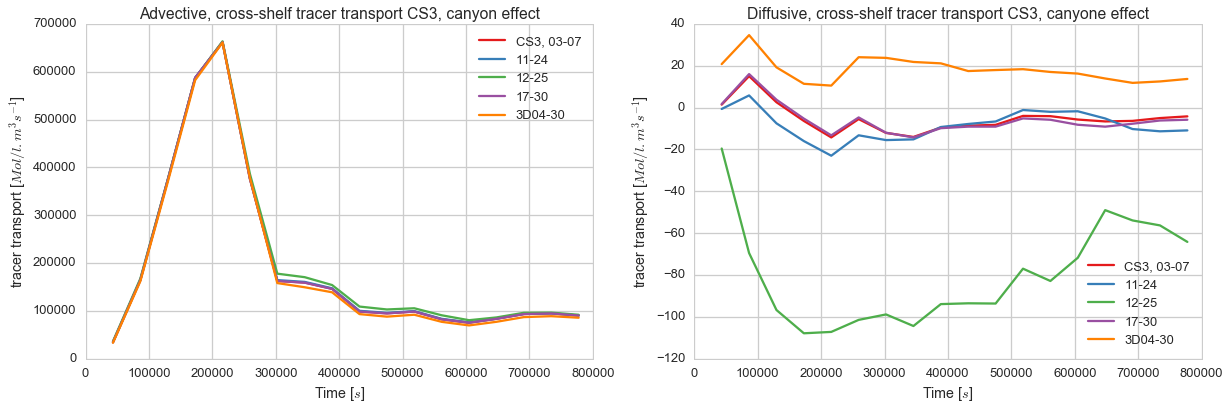

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advCS3_flux03-advCS3_flux07).plot(ax=ax[0], label = 'CS3, 03-07')
(advCS3_flux11-advCS3_flux24).plot(ax=ax[0], label = '11-24')
(advCS3_flux12-advCS3_flux25).plot(ax=ax[0], label = '12-25')
(advCS3_flux17-advCS3_flux30).plot(ax=ax[0], label = '17-30')
(advCS3_flux3D04-advCS3_flux30).plot(ax=ax[0], label = '3D04-30') 


(difCS3_flux03-difCS3_flux07).plot(ax=ax[1], label = 'CS3, 03-07')
(difCS3_flux11-difCS3_flux24).plot(ax=ax[1], label = '11-24')
(difCS3_flux12-difCS3_flux25).plot(ax=ax[1], label = '12-25')
(difCS3_flux17-difCS3_flux30).plot(ax=ax[1], label = '17-30')
(difCS3_flux3D04-difCS3_flux30).plot(ax=ax[1], label = '3D04-30') 


ax[0] = fig_looks(ax[0],title='Advective, cross-shelf tracer transport CS3, canyon effect')
ax[1] = fig_looks(ax[1],title='Diffusive, cross-shelf tracer transport CS3, canyone effect')

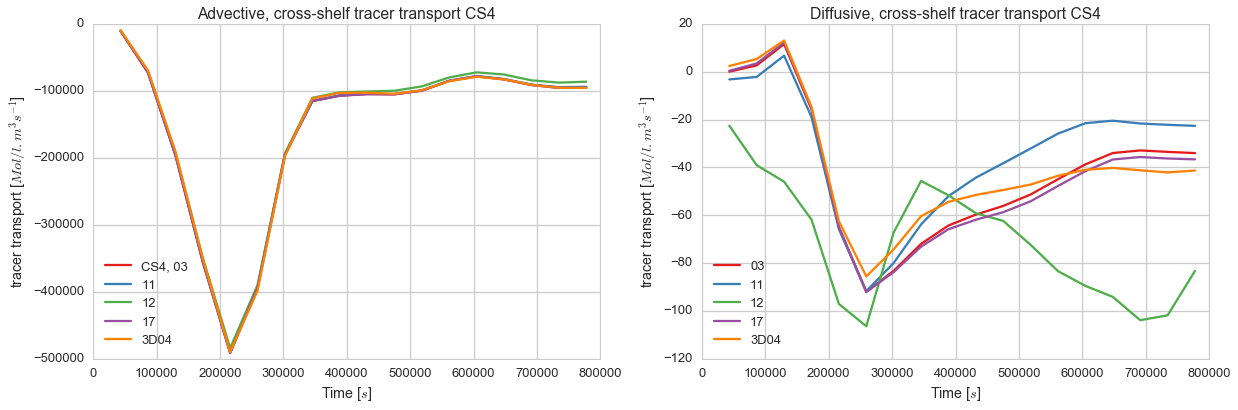

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advCS4_flux03).plot(ax=ax[0], label = 'CS4, 03')
(advCS4_flux11).plot(ax=ax[0], label = '11')
(advCS4_flux12).plot(ax=ax[0], label = '12')
(advCS4_flux17).plot(ax=ax[0], label = '17')
(advCS4_flux3D04).plot(ax=ax[0], label = '3D04') 


(difCS4_flux03).plot(ax=ax[1], label = '03')
(difCS4_flux11).plot(ax=ax[1], label = '11')
(difCS4_flux12).plot(ax=ax[1], label = '12')
(difCS4_flux17).plot(ax=ax[1], label = '17')
(difCS4_flux3D04).plot(ax=ax[1], label = '3D04') 


ax[0] = fig_looks(ax[0],title='Advective, cross-shelf tracer transport CS4')
ax[1] = fig_looks(ax[1],title='Diffusive, cross-shelf tracer transport CS4')

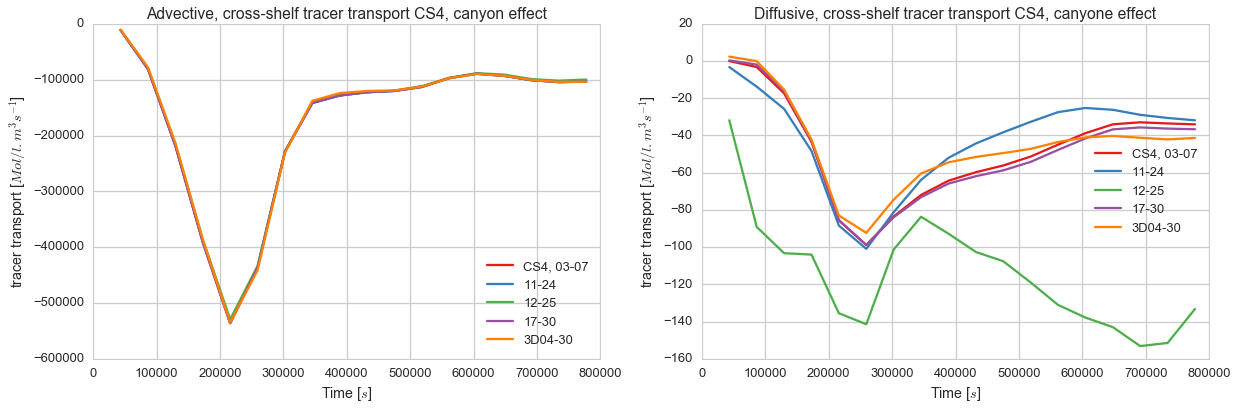

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advCS4_flux03-advCS4_flux07).plot(ax=ax[0], label = 'CS4, 03-07')
(advCS4_flux11-advCS4_flux24).plot(ax=ax[0], label = '11-24')
(advCS4_flux12-advCS4_flux25).plot(ax=ax[0], label = '12-25')
(advCS4_flux17-advCS4_flux30).plot(ax=ax[0], label = '17-30')
(advCS4_flux3D04-advCS4_flux30).plot(ax=ax[0], label = '3D04-30') 


(difCS4_flux03-difCS4_flux07).plot(ax=ax[1], label = 'CS4, 03-07')
(difCS4_flux11-difCS4_flux24).plot(ax=ax[1], label = '11-24')
(difCS4_flux12-difCS4_flux25).plot(ax=ax[1], label = '12-25')
(difCS4_flux17-difCS4_flux30).plot(ax=ax[1], label = '17-30')
(difCS4_flux3D04-difCS4_flux30).plot(ax=ax[1], label = '3D04-30') 


ax[0] = fig_looks(ax[0],title='Advective, cross-shelf tracer transport CS4, canyon effect')
ax[1] = fig_looks(ax[1],title='Diffusive, cross-shelf tracer transport CS4, canyone effect')

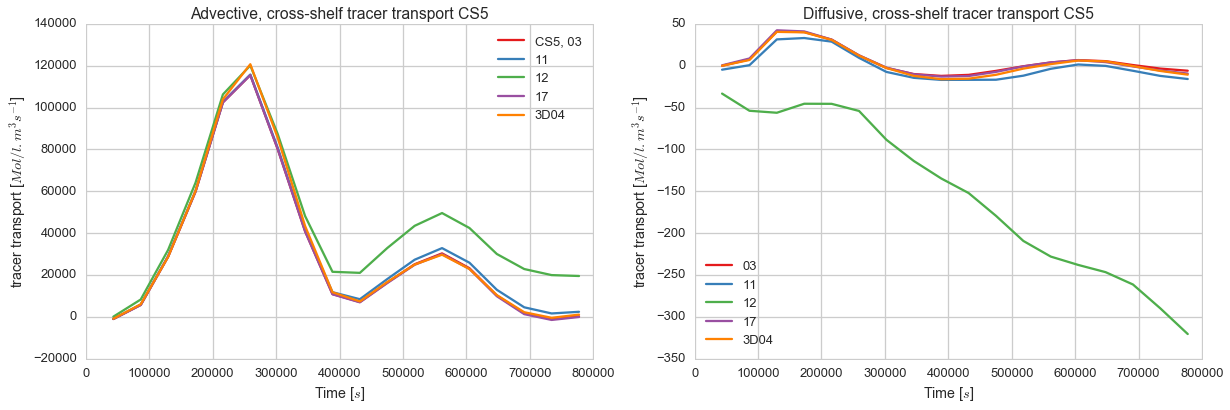

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advCS5_flux03).plot(ax=ax[0], label = 'CS5, 03')
(advCS5_flux11).plot(ax=ax[0], label = '11')
(advCS5_flux12).plot(ax=ax[0], label = '12')
(advCS5_flux17).plot(ax=ax[0], label = '17')
(advCS5_flux3D04).plot(ax=ax[0], label = '3D04') 


(difCS5_flux03).plot(ax=ax[1], label = '03')
(difCS5_flux11).plot(ax=ax[1], label = '11')
(difCS5_flux12).plot(ax=ax[1], label = '12')
(difCS5_flux17).plot(ax=ax[1], label = '17')
(difCS5_flux3D04).plot(ax=ax[1], label = '3D04') 


ax[0] = fig_looks(ax[0],title='Advective, cross-shelf tracer transport CS5')
ax[1] = fig_looks(ax[1],title='Diffusive, cross-shelf tracer transport CS5')

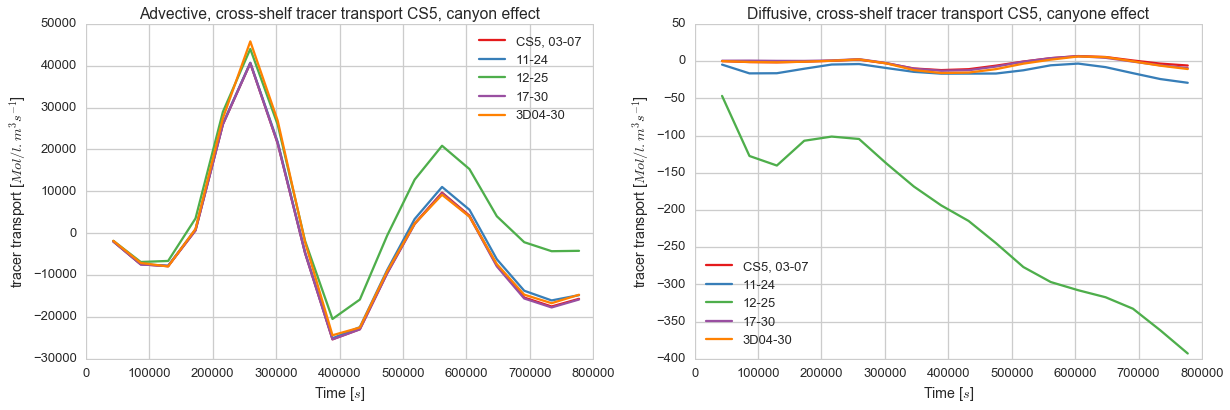

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advCS5_flux03-advCS5_flux07).plot(ax=ax[0], label = 'CS5, 03-07')
(advCS5_flux11-advCS5_flux24).plot(ax=ax[0], label = '11-24')
(advCS5_flux12-advCS5_flux25).plot(ax=ax[0], label = '12-25')
(advCS5_flux17-advCS5_flux30).plot(ax=ax[0], label = '17-30')
(advCS5_flux3D04-advCS5_flux30).plot(ax=ax[0], label = '3D04-30') 


(difCS5_flux03-difCS5_flux07).plot(ax=ax[1], label = 'CS5, 03-07')
(difCS5_flux11-difCS5_flux24).plot(ax=ax[1], label = '11-24')
(difCS5_flux12-difCS5_flux25).plot(ax=ax[1], label = '12-25')
(difCS5_flux17-difCS5_flux30).plot(ax=ax[1], label = '17-30')
(difCS5_flux3D04-difCS5_flux30).plot(ax=ax[1], label = '3D04-30') 


ax[0] = fig_looks(ax[0],title='Advective, cross-shelf tracer transport CS5, canyon effect')
ax[1] = fig_looks(ax[1],title='Diffusive, cross-shelf tracer transport CS5, canyone effect')

## Alongshore transports

### Downstream, near canyon rim

In [21]:
advAS1c_flux03 = calc_trac_transport_AS(unstagger_xarray(flux03.ADVxTr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
advAS2c_flux03 = calc_trac_transport_AS(unstagger_xarray(flux03.ADVxTr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
advAS3c_flux03 = calc_trac_transport_AS(unstagger_xarray(flux03.ADVxTr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')

difAS1c_flux03 = calc_trac_transport_AS(unstagger_xarray(flux03.DFxETr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
difAS2c_flux03 = calc_trac_transport_AS(unstagger_xarray(flux03.DFxETr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
difAS3c_flux03 = calc_trac_transport_AS(unstagger_xarray(flux03.DFxETr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')

advAS1c_flux11 = calc_trac_transport_AS(unstagger_xarray(flux11.ADVxTr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
advAS2c_flux11 = calc_trac_transport_AS(unstagger_xarray(flux11.ADVxTr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
advAS3c_flux11 = calc_trac_transport_AS(unstagger_xarray(flux11.ADVxTr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')

difAS1c_flux11 = calc_trac_transport_AS(unstagger_xarray(flux11.DFxETr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
difAS2c_flux11 = calc_trac_transport_AS(unstagger_xarray(flux11.DFxETr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
difAS3c_flux11 = calc_trac_transport_AS(unstagger_xarray(flux11.DFxETr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')

advAS1c_flux12 = calc_trac_transport_AS(unstagger_xarray(flux12.ADVxTr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
advAS2c_flux12 = calc_trac_transport_AS(unstagger_xarray(flux12.ADVxTr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
advAS3c_flux12 = calc_trac_transport_AS(unstagger_xarray(flux12.ADVxTr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')

difAS1c_flux12 = calc_trac_transport_AS(unstagger_xarray(flux12.DFxETr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
difAS2c_flux12 = calc_trac_transport_AS(unstagger_xarray(flux12.DFxETr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
difAS3c_flux12 = calc_trac_transport_AS(unstagger_xarray(flux12.DFxETr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')

advAS1c_flux17 = calc_trac_transport_AS(unstagger_xarray(flux17.ADVxTr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
advAS2c_flux17 = calc_trac_transport_AS(unstagger_xarray(flux17.ADVxTr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
advAS3c_flux17 = calc_trac_transport_AS(unstagger_xarray(flux17.ADVxTr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')

difAS1c_flux17 = calc_trac_transport_AS(unstagger_xarray(flux17.DFxETr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
difAS2c_flux17 = calc_trac_transport_AS(unstagger_xarray(flux17.DFxETr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
difAS3c_flux17 = calc_trac_transport_AS(unstagger_xarray(flux17.DFxETr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')

advAS1c_flux3D04 = calc_trac_transport_AS(unstagger_xarray(flux3D04.ADVxTr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
advAS2c_flux3D04 = calc_trac_transport_AS(unstagger_xarray(flux3D04.ADVxTr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
advAS3c_flux3D04 = calc_trac_transport_AS(unstagger_xarray(flux3D04.ADVxTr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')

difAS1c_flux3D04 = calc_trac_transport_AS(unstagger_xarray(flux3D04.DFxETr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
difAS2c_flux3D04 = calc_trac_transport_AS(unstagger_xarray(flux3D04.DFxETr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
difAS3c_flux3D04 = calc_trac_transport_AS(unstagger_xarray(flux3D04.DFxETr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')


In [22]:
advAS1c_flux07 = calc_trac_transport_AS(unstagger_xarray(flux07.ADVxTr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
advAS2c_flux07 = calc_trac_transport_AS(unstagger_xarray(flux07.ADVxTr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
advAS3c_flux07 = calc_trac_transport_AS(unstagger_xarray(flux07.ADVxTr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')

difAS1c_flux07 = calc_trac_transport_AS(unstagger_xarray(flux07.DFxETr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
difAS2c_flux07 = calc_trac_transport_AS(unstagger_xarray(flux07.DFxETr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
difAS3c_flux07 = calc_trac_transport_AS(unstagger_xarray(flux07.DFxETr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')

advAS1c_flux24 = calc_trac_transport_AS(unstagger_xarray(flux24.ADVxTr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
advAS2c_flux24 = calc_trac_transport_AS(unstagger_xarray(flux24.ADVxTr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
advAS3c_flux24 = calc_trac_transport_AS(unstagger_xarray(flux24.ADVxTr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')

difAS1c_flux24 = calc_trac_transport_AS(unstagger_xarray(flux24.DFxETr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
difAS2c_flux24 = calc_trac_transport_AS(unstagger_xarray(flux24.DFxETr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
difAS3c_flux24 = calc_trac_transport_AS(unstagger_xarray(flux24.DFxETr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')

advAS1c_flux25 = calc_trac_transport_AS(unstagger_xarray(flux25.ADVxTr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
advAS2c_flux25 = calc_trac_transport_AS(unstagger_xarray(flux25.ADVxTr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
advAS3c_flux25 = calc_trac_transport_AS(unstagger_xarray(flux25.ADVxTr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')

difAS1c_flux25 = calc_trac_transport_AS(unstagger_xarray(flux25.DFxETr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
difAS2c_flux25 = calc_trac_transport_AS(unstagger_xarray(flux25.DFxETr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
difAS3c_flux25 = calc_trac_transport_AS(unstagger_xarray(flux25.DFxETr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')

advAS1c_flux30 = calc_trac_transport_AS(unstagger_xarray(flux30.ADVxTr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
advAS2c_flux30 = calc_trac_transport_AS(unstagger_xarray(flux30.ADVxTr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
advAS3c_flux30 = calc_trac_transport_AS(unstagger_xarray(flux30.ADVxTr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')

difAS1c_flux30 = calc_trac_transport_AS(unstagger_xarray(flux30.DFxETr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
difAS2c_flux30 = calc_trac_transport_AS(unstagger_xarray(flux30.DFxETr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
difAS3c_flux30 = calc_trac_transport_AS(unstagger_xarray(flux30.DFxETr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')

advAS1c_flux30 = calc_trac_transport_AS(unstagger_xarray(flux30.ADVxTr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
advAS2c_flux30 = calc_trac_transport_AS(unstagger_xarray(flux30.ADVxTr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
advAS3c_flux30 = calc_trac_transport_AS(unstagger_xarray(flux30.ADVxTr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')

difAS1c_flux30 = calc_trac_transport_AS(unstagger_xarray(flux30.DFxETr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
difAS2c_flux30 = calc_trac_transport_AS(unstagger_xarray(flux30.DFxETr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
difAS3c_flux30 = calc_trac_transport_AS(unstagger_xarray(flux30.DFxETr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')


MemoryError: 

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advAS1c_flux03).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS1 03')
(advAS1c_flux11).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS1 11')
(advAS1c_flux12).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS1 12')
(advAS1c_flux17).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS1 17')
(advAS1c_flux3D04).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS1 3D04')

(difAS1c_flux03).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS1 03')
(difAS1c_flux11).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS1 11')
(difAS1c_flux12).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS1 12')
(difAS1c_flux17).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS1 17')
(difAS1c_flux3D04).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS1 3D04')


ax[0] = fig_looks(ax[0],title='Advective, alongshelf tracer transport dmstrm canyon')
ax[1] = fig_looks(ax[1],title='Diffusive, alongshelf tracer transport dnstrm canyon')

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advAS1c_flux03-advAS1c_flux07).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS1 03-07')
(advAS1c_flux11-advAS1c_flux24).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS1 11-24')
(advAS1c_flux12-advAS1c_flux25).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS1 12-25')
(advAS1c_flux17-advAS1c_flux30).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS1 17-30')
(advAS1c_flux3D04-advAS1c_flux30).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS1 3D04-30')

(difAS1c_flux03-difAS1c_flux07).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS1 03-07')
(difAS1c_flux11-difAS1c_flux24).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS1 11-24')
(difAS1c_flux12-difAS1c_flux25).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS1 12-25')
(difAS1c_flux17-difAS1c_flux30).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS1 17-30')
(difAS1c_flux3D04-difAS1c_flux30).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS1 3D04-30')


ax[0] = fig_looks(ax[0],title='Advective, alongshelf tracer transport dmstrm canyon')
ax[1] = fig_looks(ax[1],title='Diffusive, alongshelf tracer transport dnstrm canyon')

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advAS2c_flux03).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS2 03')
(advAS2c_flux11).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS2 11')
(advAS2c_flux12).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS2 12')
(advAS2c_flux17).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS2 17')
(advAS2c_flux3D04).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS2 3D04')

(difAS2c_flux03).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS2 03')
(difAS2c_flux11).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS2 11')
(difAS2c_flux12).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS2 12')
(difAS2c_flux17).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS2 17')
(difAS2c_flux3D04).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS2 3D04')


ax[0] = fig_looks(ax[0],title='Advective, alongshelf tracer transport dmstrm canyon')
ax[1] = fig_looks(ax[1],title='Diffusive, alongshelf tracer transport dnstrm canyon')

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advAS2c_flux03-advAS2c_flux07).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS2 03-07')
(advAS2c_flux11-advAS2c_flux24).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS2 11-24')
(advAS2c_flux12-advAS2c_flux25).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS2 12-25')
(advAS2c_flux17-advAS2c_flux30).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS2 17-30')
(advAS2c_flux3D04-advAS2c_flux30).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS2 3D04-30')

(difAS2c_flux03-difAS2c_flux07).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS2 03-07')
(difAS2c_flux11-difAS2c_flux24).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS2 11-24')
(difAS2c_flux12-difAS2c_flux25).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS2 12-25')
(difAS2c_flux17-difAS2c_flux30).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS2 17-30')
(difAS2c_flux3D04-difAS2c_flux30).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS2 3D04-30')


ax[0] = fig_looks(ax[0],title='Advective, alongshelf tracer transport dmstrm canyon')
ax[1] = fig_looks(ax[1],title='Diffusive, alongshelf tracer transport dnstrm canyon')

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advAS3c_flux03).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS3 03')
(advAS3c_flux11).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS3 11')
(advAS3c_flux12).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS3 12')
(advAS3c_flux17).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS3 17')
(advAS3c_flux3D04).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS3 3D04')

(difAS3c_flux03).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS3 03')
(difAS3c_flux11).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS3 11')
(difAS3c_flux12).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS3 12')
(difAS3c_flux17).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS3 17')
(difAS3c_flux3D04).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS3 3D04')


ax[0] = fig_looks(ax[0],title='Advective, alongshelf tracer transport dmstrm canyon')
ax[1] = fig_looks(ax[1],title='Diffusive, alongshelf tracer transport dnstrm canyon')

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advAS3c_flux03-advAS3c_flux07).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS3 03-07')
(advAS3c_flux11-advAS3c_flux24).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS3 11-24')
(advAS3c_flux12-advAS3c_flux25).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS3 12-25')
(advAS3c_flux17-advAS3c_flux30).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS3 17-30')
(advAS3c_flux3D04-advAS3c_flux30).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS3 3D04-30')

(difAS3c_flux03-difAS3c_flux07).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS3 03-07')
(difAS3c_flux11-difAS3c_flux24).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS3 11-24')
(difAS3c_flux12-difAS3c_flux25).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS3 12-25')
(difAS3c_flux17-difAS3c_flux30).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS3 17-30')
(difAS3c_flux3D04-difAS3c_flux30).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS3 3D04-30')


ax[0] = fig_looks(ax[0],title='Advective, alongshelf tracer transport dmstrm canyon')
ax[1] = fig_looks(ax[1],title='Diffusive, alongshelf tracer transport dnstrm canyon')

### Vertical transport at shelf break depth (only within the canyon)


In [4]:
advVR1_flux03 = (unstagger_xarray(flux03.ADVrTr01,'Zld000090').isel(Zld000090=30, X= slice(120,225), Y=slice(227,267))).sum(dim='X')
difEVR1_flux03 = (unstagger_xarray(flux03.DFrETr01,'Zld000090').isel(Zld000090=30, X= slice(120,225), Y=slice(227,267))).sum(dim='X')
difIVR1_flux03 = (unstagger_xarray(flux03.DFrITr01,'Zld000090').isel(Zld000090=30, X= slice(120,225), Y=slice(227,267))).sum(dim='X')

advVR1_flux11 = (unstagger_xarray(flux11.ADVrTr01,'Zld000090').isel(Zld000090=30, X= slice(120,225), Y=slice(227,267))).sum(dim='X')
difEVR1_flux11 = (unstagger_xarray(flux11.DFrETr01,'Zld000090').isel(Zld000090=30, X= slice(120,225), Y=slice(227,267))).sum(dim='X')
difIVR1_flux11 = (unstagger_xarray(flux11.DFrITr01,'Zld000090').isel(Zld000090=30, X= slice(120,225), Y=slice(227,267))).sum(dim='X')

advVR1_flux12 = (unstagger_xarray(flux12.ADVrTr01,'Zld000090').isel(Zld000090=30, X= slice(120,225), Y=slice(227,267))).sum(dim='X')
difEVR1_flux12 = (unstagger_xarray(flux12.DFrETr01,'Zld000090').isel(Zld000090=30, X= slice(120,225), Y=slice(227,267))).sum(dim='X')
difIVR1_flux12 = (unstagger_xarray(flux12.DFrITr01,'Zld000090').isel(Zld000090=30, X= slice(120,225), Y=slice(227,267))).sum(dim='X')

advVR1_flux17 = (unstagger_xarray(flux17.ADVrTr01,'Zld000090').isel(Zld000090=30, X= slice(120,225), Y=slice(227,267))).sum(dim='X')
difEVR1_flux17 = (unstagger_xarray(flux17.DFrETr01,'Zld000090').isel(Zld000090=30, X= slice(120,225), Y=slice(227,267))).sum(dim='X')
difIVR1_flux17 = (unstagger_xarray(flux17.DFrITr01,'Zld000090').isel(Zld000090=30, X= slice(120,225), Y=slice(227,267))).sum(dim='X')

advVR1_flux3D04 = (unstagger_xarray(flux3D04.ADVrTr01,'Zld000090').isel(Zld000090=30, X= slice(120,225), Y=slice(227,267))).sum(dim='X')
difEVR1_flux3D04 = (unstagger_xarray(flux3D04.DFrETr01,'Zld000090').isel(Zld000090=30, X= slice(120,225), Y=slice(227,267))).sum(dim='X')
difIVR1_flux3D04 = (unstagger_xarray(flux3D04.DFrITr01,'Zld000090').isel(Zld000090=30, X= slice(120,225), Y=slice(227,267))).sum(dim='X')



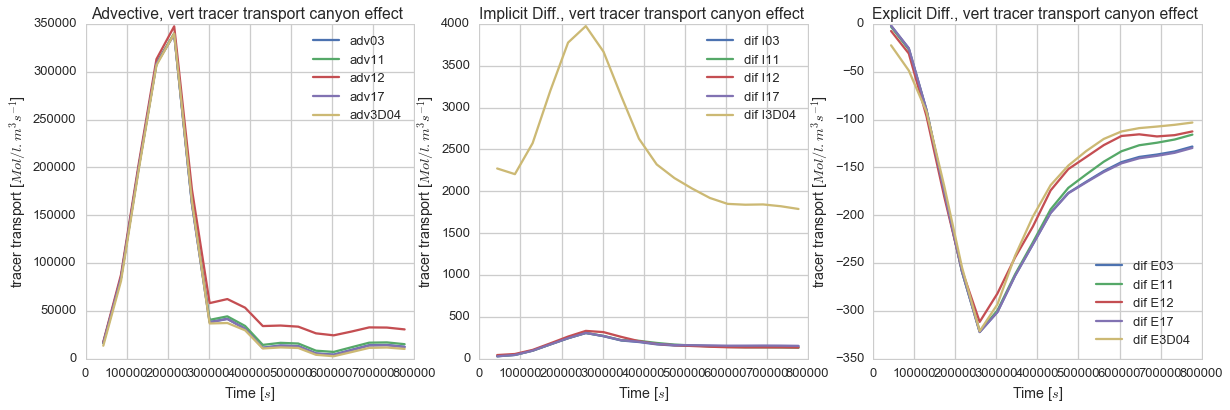

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

(advVR1_flux03).sum(dim='Y').plot(ax=ax[0], label = 'adv03')
(advVR1_flux11).sum(dim='Y').plot(ax=ax[0], label = 'adv11')
(advVR1_flux12).sum(dim='Y').plot(ax=ax[0], label = 'adv12')
(advVR1_flux17).sum(dim='Y').plot(ax=ax[0], label = 'adv17')
(advVR1_flux3D04).sum(dim='Y').plot(ax=ax[0], label = 'adv3D04')



(difIVR1_flux03).sum(dim='Y').plot(ax=ax[1], label = 'dif I03')
(difIVR1_flux11).sum(dim='Y').plot(ax=ax[1], label = 'dif I11')
(difIVR1_flux12).sum(dim='Y').plot(ax=ax[1], label = 'dif I12')
(difIVR1_flux17).sum(dim='Y').plot(ax=ax[1], label = 'dif I17')
(difIVR1_flux3D04).sum(dim='Y').plot(ax=ax[1], label = 'dif I3D04')


(difEVR1_flux03).sum(dim='Y').plot(ax=ax[2], label = 'dif E03')
(difEVR1_flux11).sum(dim='Y').plot(ax=ax[2], label = 'dif E11')
(difEVR1_flux12).sum(dim='Y').plot(ax=ax[2], label = 'dif E12')
(difEVR1_flux17).sum(dim='Y').plot(ax=ax[2], label = 'dif E17')
(difEVR1_flux3D04).sum(dim='Y').plot(ax=ax[2], label = 'dif E3D04')


ax[0] = fig_looks(ax[0],title='Advective, vert tracer transport canyon effect ')
ax[1] = fig_looks(ax[1],title='Implicit Diff., vert tracer transport canyon effect ')
ax[1] = fig_looks(ax[2],title='Explicit Diff., vert tracer transport canyon effect ')

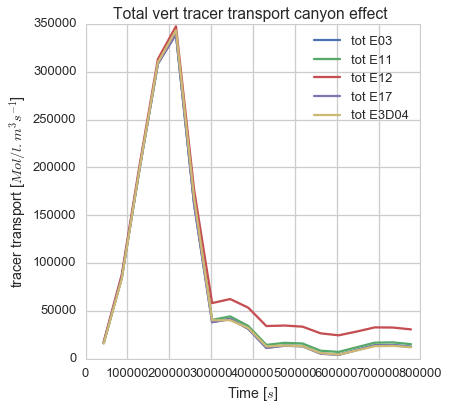

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

(difEVR1_flux03+difIVR1_flux03+advVR1_flux03).sum(dim='Y').plot(ax=ax, label = 'tot E03')
(difEVR1_flux11+difIVR1_flux11+advVR1_flux11).sum(dim='Y').plot(ax=ax, label = 'tot E11')
(difEVR1_flux12+difIVR1_flux12+advVR1_flux12).sum(dim='Y').plot(ax=ax, label = 'tot E12')
(difEVR1_flux17+difIVR1_flux17+advVR1_flux17).sum(dim='Y').plot(ax=ax, label = 'tot E17')
(difEVR1_flux3D04+difIVR1_flux3D04+advVR1_flux3D04).sum(dim='Y').plot(ax=ax, label = 'tot E3D04')


ax = fig_looks(ax,title='Total vert tracer transport canyon effect ')
